**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challenge 1

Luis Fernando - FTDS Batch 10


## Description

### Objective

Ingin menganalisa tentang kekuatan Pokemon , hingga jumlah Pokemon tertentu berdasarkan kategori yang dipilih

### Problem Statement

Di bawah ini, berdasarkan rubrik yang diberikan , :
- Saya mencoba mengganti data yang kosong dengan 'N/A',
- Mengganti nama kolom yang menurut saya dapat diganti dengan preferensi saya
- Mencoba menghapus kolom # karena saya kesulitan untuk menggunakan apalagi angkanya yang ternyata tidak berurutan (maka dari itu saya 'skip')
- Top 10 Pokemon terbaik berdasarkan TotalStats (kekuatan secara keseluruhan)
- Dari Top 10 Pokemon terbaik berdasarkan TotalStats, apa saja yang tidak memiliki Elemen kedua
- Elemen apa yang berada di Kumpulan pokemon Legendary (masing - masing Elemen 1 dan 2)
- Apakah ada pokemon Legendary yang mewakili Elemen 1 dan Elemen 2 terbanyak ? 
- Mencari Pokemon yang terlemah & terkuat dari semua stats nya (dari Attack sampai Sp.def)
- Mencari pokemon berdasarkan ATK , Sp.Atk , dan Speed terbesar (untuk memutuskan mengambil pokemon ini untuk tipe agresif)
- Mengurutkan elemen pokemon dengan rata - rata Total Stats nya
- Mencari berapa rata - rata total Stats antara yang Legendary dan Non Legendary
- Top 10 Elemen pokemon Legendary (Plot)
- Top 10 Pokemon dengan TotalATK tertinggi (TotalATK perhitungannya sudah saya tuliskan dibawah spt apa)(Plot)
- Masing2 Generasi ada berapa banyak yang Legendary (Plot)

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

##### Dibawah ini merupakan import data library untuk dapat menganalisa file CSV Pokemon yang diinginkan

In [1]:
import pandas as pd 

----

##### Membaca file csv Pokemon terlebih dahulu

In [2]:
df = pd.read_csv('D:/Hacktiv8/Dataset/Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Di atas merupakan hasil loading data Pokemon csv terdiri dari 800 baris dan 13 kolom

---

### Periksa Missing Values

Langkah awal untuk memeriksa missing values:
- Saya mencoba menggunakan hal paling sederhana terlebih dahulu , yaitu menggunakan info() untuk melihat secara garis besar terlebih dahulu
- Kemudian melakukan describe() untuk melihat apakah ada data integer yang angkanya negatif atau 0 sehingga jika ada, perlu diperiksa lagi apakah itu normal atau tidak.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


Nah dari pemanfaatan info(), yang bisa saya lihat:
- Masing - masing data memiliki karakteristik tipe data yang sesuai dengan harapan tipe data masing - masing kolom
- Tetapi masih ada Type 2 yang mungkin perlu kita periksa karena hanya ada 414 yang tidak null (dibanding 800 data secara keseluruhan)

----

Langkah selanjutnya :
- Saya coba memeriksa kolom # tetapi terlalu tidak mengikuti urutan , sehingga # akan coba kita eliminasi nanti saat tahapan data cleaning
- Type 1 ,Type 2, Generation, dan Legendary menurut analisa awal saya adalah data yang unique , sehingga nanti akan kita periksa apakah benar - benar unique atu tidak
- Melanjutkan caption sebelumnya terkait pemeriksaan Type 2 apakah nan nya menghambat analisa atau sebenarnya memang nan

Memeriksa unique value dari Type 1

In [5]:
#Periksa apakah Type 1 unique values
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Dari Type 1 unique valuesnya cukup terlihat unique , sehingga bisa kita lanjutkan untuk teruskan ke kolom Type 2

In [6]:
#Periksa apakah Type 2 unique values
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Untuk type 2 juga ada yang datanya nan berdasarkan .info(), tetapi tidak ada data yang salah atau terlalu menjadi masalah, atau dapat kita periksa dulu ada berapa jumlah data yang nan 

In [7]:
df['Type 2'].isnull().sum()

386

Ternyata, ada 386 Pokemon yang tidak memiliki Type 2 di dalamnya,maka dapat diasumsikan bahwa :
- Ada 414 Pokemon yang memiliki dua Type

Dari data yang kosong , untuk menghandle missing values saya mencoba untuk mengisi yang kosong dengan 'N/A'

In [8]:
# Mengganti Elemen 2 yang kosong dengan N/A 
fill_na = {'Type 2':'N/A'}
df.fillna(value = fill_na,inplace=True)

Setelah mengganti missing values pada Type 2 dengan 'N/A' , coba kita periksa ke kolom Generation terkait unique value spt di atas sebelumnya

In [9]:
df['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Generation tidak ada values yang terlalu menonjol / outlier, sehingga bisa kita periksa ke kolom Legendary

In [10]:
df['Legendary'].unique()

array([False,  True])

Legendary tidak ada values yang outlier , sehingga kita coba periksa ke step selanjutnya

---

### Manipulating Columns
Pada kasus manipulasi kolom, yang ingin saya lakukan adalah :
- Menghapus kolom pagar karena menurut saya sangat mengganggu urutan baris dan tidak terpakai
- Mengganti nama Type1 dan Type2 Menjadi Elemen 1 dan Elemen 2
- Mengganti Name menjadi Nama Pokemon
- Mengganti Total menjadi Total Stats

In [11]:
#Rename kolom yang telah disampaikan pada poin di atas
df.rename(columns={'Name':'Nama Pokemon','Type 1':'Elemen 1','Type 2':'Elemen 2','Total':'Total Stats'})

,#,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Di atas merupakan hasil output dari pergantian nama kolom , saya merasa perlu untuk mengganti beberapa nama kolom tersebut, sehingga perlu dilakukan fungsi inplace agar permanen terganti

In [12]:
df.rename(columns={'Name':'Nama Pokemon','Type 1':'Elemen 1','Type 2':'Elemen 2','Total':'Total Stats'},inplace = True)
df

,#,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Setelah melakukan pergantian nama kolom, 
saya mencoba untuk menghapus kolom # 
yang menurut saya tidak terlalu terpakai, 
karena banyak value yang duplikat di dalamnya

In [13]:
#Mencoba menghapus kolom '#'
df.drop('#',axis=1)

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Karena menurut saya, penghapusan kolom # perlu dihapus maka saya coba putuskan untuk di inplace secara permanen

In [14]:
# Menghapus # secara permanen
df.drop('#',axis=1,inplace=True)

In [15]:
# Memeriksa apakah kolom # sudah terhapus secara permanen
df

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Data Query 1
Query data yang ingin saya lakukan adalah :
- Top 10 apa saja yang [Total Stats] nya paling tinggi
- Dalam Top 10 , mau dilihat ada berapa yang Legendary dan Non Legendary
- Melihat apakah ada yang punya 1 elemen saja pada Top 10 

In [16]:
# Mencoba memeriksa Top 10 apa saja yang tertinggi berdasarkan Total Stats
top_10_pokemon_totalStats = df.sort_values(by='Total Stats',ascending=False).head(10)
top_10_pokemon_totalStats

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,MewtwoMega Mewtwo Y,Psychic,N/A,780,106,150,70,194,120,140,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,KyogrePrimal Kyogre,Water,N/A,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,Arceus,Normal,N/A,720,120,120,120,120,120,120,4,True
712,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


Di atas sudah muncul top 10 nama pokemon berdasarkan Total Stats, kemudian saya mau coba untuk memeriksa Top 10 Pokemon ada berapa yang merupakan tipe Legendary

In [17]:
# Memeriksa dari top 10 ada beberapa yang Legendary dan bukan Legendary
top_10_pokemon_totalStats['Legendary'].value_counts()

True     8
False    2
Name: Legendary, dtype: int64

Dari hasil di atas, terlihat bahwa :
- Dari 10 Pokemon terbaik , terdapat 8 yang merupakan Legendary, dan 2 bukan Legendary

Selanjutnya , dari Top 10 saya juga ingin lihat apakah ada pokemon yang tidak memiliki elemen kedua (hanya punya 1 elemen)

In [18]:
# Memeriksa dari top 10 tentang elemen kedua
top_10_pokemon_totalStats[top_10_pokemon_totalStats['Elemen 2']=='N/A']

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,MewtwoMega Mewtwo Y,Psychic,N/A,780,106,150,70,194,120,140,1,True
422,KyogrePrimal Kyogre,Water,N/A,770,100,150,90,180,160,90,3,True
552,Arceus,Normal,N/A,720,120,120,120,120,120,120,4,True


Dari hasil di atas, terlihat bahwa :
- Ternyata dari 10 Pokemon terbaik , ada 3 yang merupakan Pokemon 1 Elemen, 7 sisanya merupakan Pokemon dengan 2 Elemen

Ternyata , dari Top 10 ada 3 Pokemon yang Elemen 2 nya tidak ada (atau simpel nya hanya memiliki 1 Elemen) ,terdiri dari
- Metwo Y , yang hanya berelemen Psychic dengan Total Stats 780 dan Legendary
- Kyogre , yang hanya berelemen Wwater dengan Total Stats 770 dan Legendary
- Arceus, yang hanya berelemen normal dengan Total Stats 720 dan Legendary

----

### Data Query 2
Query kedua yang ingin saya analisa adalah :
- Saya ingin melihat dari sisi tabel yang hanya mengandung Legendary, Elemen 1 nya terbanyak apa , dan Elemen 2 terbanyak apa
- Apakah ada pokemon yang elemen 1 dan elemen 2 nya tertinggi 

In [20]:
# Membuat Query Mengenai Tabel Pokemon Legendary 
legendary_pokemon = df.query("Legendary == True").sort_values(by="Total Stats",ascending=False)
legendary_pokemon

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,N/A,780,106,150,70,194,120,140,1,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,KyogrePrimal Kyogre,Water,N/A,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
701,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
705,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
704,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True


Di atas merupakan hasil tabel Pokemon Legendary dengan jumlah 65 baris 

Setelah saya membuat tabel pokemon yang hanya Legendary saja, elemen pertama apa yang terbanyak dari tabel Legendary

In [46]:
# Menghitung masing - masing Elemen pertama yang dimiliki pokemon Legendary (dalam bentuk persen)
legendary_pokemon['Elemen 1'].value_counts(normalize=True)

Psychic     0.215385
Dragon      0.184615
Fire        0.076923
Water       0.061538
Ground      0.061538
Rock        0.061538
Steel       0.061538
Electric    0.061538
Grass       0.046154
Normal      0.030769
Ghost       0.030769
Dark        0.030769
Flying      0.030769
Ice         0.030769
Fairy       0.015385
Name: Elemen 1, dtype: float64

Ternyata, dari melihat elemen pertamanya, karakter Pokemon Legendary merupakan berelemen Psychic dan Dragon yang terbanyak dengan masing - masing 14 dan 12 

Kemudian, untuk elemen kedua apa saja yang terbanyak dari tabel Legendary

In [47]:
legendary_pokemon['Elemen 2'].value_counts(normalize=True)

N/A         0.384615
Flying      0.200000
Psychic     0.076923
Fighting    0.061538
Dragon      0.061538
Fire        0.046154
Ice         0.046154
Fairy       0.030769
Electric    0.015385
Dark        0.015385
Ghost       0.015385
Ground      0.015385
Water       0.015385
Steel       0.015385
Name: Elemen 2, dtype: float64

Elemen kedua dari karakter Pokemon Legendary merupakan berelemen Flying dengan total 13

Disini saya ingin memeriksa sekaligus apakah ada yang berelemen Psychic dan Flying ? Mari kita coba

In [23]:
legendary_pokemon[
    (df['Elemen 1']=='Psychic')&
    (df['Elemen 2']=='Flying')
]

C:\Users\Cranel\AppData\Local\Temp/ipykernel_7716/1329440013.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  legendary_pokemon[


,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
269,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


Ternyata ada Pokemon yang memiliki Elemen 1 dan 2 terbanyak , yaitu Lugia.. Bagaimana dengan Dragon & Flying ? Mari kita coba lagi

In [24]:
legendary_pokemon[
    (legendary_pokemon['Elemen 1']=='Dragon') &
    (legendary_pokemon['Elemen 2']== 'Flying')
]

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
425,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True


Ternyata ada Pokemon yang memiliki Elemen 1 dan 2 terbanyak, yaitu RayquazaMega Rayquaza & Rayquaza

----

### Data Query 3
Di sini, saya ingin memeriksa :
- Apakah ada Pokemon yang perfect sekali (semuanya tertinggi dari semua stats)

Pertama - tama , saya ingin mencoba buat apakah ada pokemon yang tertinggi dari semua stat

In [25]:
#Mencoba mencari apakah ada pokemon yang tertinggi dari semua stats
df[
    (df['HP']==df['HP'].max())&
    (df['Attack']==df['Attack'].max())&
    (df['Defense']==df['Defense'].max())&
    (df['Sp. Atk']==df['Sp. Atk'].max())&
    (df['Sp. Def']==df['Sp. Def'].max())&
    (df['Speed']==df['Speed'].max())
]

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


Dari data di atas, tidak ada pokemon yang sangat sempurna dari semua statsnya , namun, apakah ada yang terlemah? Mari kita coba

In [26]:
#Mencoba mencari apakah ada pokemon yang tertinggi dari semua stats
df[
    (df['HP']==df['HP'].min())&
    (df['Attack']==df['Attack'].min())&
    (df['Defense']==df['Defense'].min())&
    (df['Sp. Atk']==df['Sp. Atk'].min())&
    (df['Sp. Def']==df['Sp. Def'].min())&
    (df['Speed']==df['Speed'].min())
]

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


Dari data di atas, tidak ada pokemon yang sangat lemah dari semua statsnya

Langkah selanjutnya yang ingin saya periksa , saya ingin melihat apakah ada Pokemon dengan Attack, Sp. Atk, dan Speed terbesar (menggunakan sort values)

In [27]:
df.sort_values(by=['Attack'],ascending=False).head(10)

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,DeoxysAttack Forme,Psychic,N/A,600,50,180,20,180,20,150,3,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
387,BanetteMega Banette,Ghost,N/A,555,64,165,75,93,83,75,3,False
454,Rampardos,Rock,N/A,495,97,165,60,65,50,58,4,False


Nah, dari hasil di atas dapat kita putuskan bahwa ke 10 pokemon teratas yang saya saring, mungkin ini merupakan Pokemon dengan tingkat daya desktruktif tertinggi dibandingkan pokemon lainnya

----

### Group by and Aggregating
Disini saya ingin mencoba :
- Berapa rata - rata Total Stats tertinggi dari masing - masing Elemen 1 dan Elemen 2

#### Group by 1

In [28]:
df.groupby('Elemen 1')['Total Stats'].mean().sort_values(ascending=False)

Elemen 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total Stats, dtype: float64

In [49]:
df.groupby('Elemen 2')['Total Stats'].mean().sort_values(ascending=False)

Elemen 2
Dragon      526.166667
Fighting    525.846154
Ice         525.714286
Fire        506.250000
Steel       485.227273
Dark        484.400000
Psychic     479.060606
Electric    455.333333
Flying      452.546392
Ground      444.342857
Rock        434.642857
Ghost       430.714286
Water       418.214286
Fairy       417.956522
N/A         412.015544
Normal      411.500000
Grass       408.920000
Poison      396.500000
Bug         393.333333
Name: Total Stats, dtype: float64

Dari mengecek rata - rata Total stats berdasarkan Elemen 1 & 2 :
- Yang tertinggi secara rata - rata total stats adalah Dragon. 
- Sehingga Dragon mungkin akan menjadi incaran banyak player Pokemon karena rata - rata Total Stats yang cukup tinggi dan ;
- Menarik untuk dikoleksi karena cukup kuat

Sekarang, saya ingin menghitung ada apa saja Dragon yang Total Stats nya, berada di atas rata - rata Dragon secara keseluruhan

In [30]:
# Kita hitung dulu mean dari Total Stats ber 'Elemen 1' Dragon adalah berapa
meanDragon = df.loc[df['Elemen 1']=='Dragon','Total Stats'].mean()



In [31]:
# Setelah menemukan meanDragon tersebut, mari kita cari Dragon apa saja yang berada di atas rata - rata. 
df[
    (df['Total Stats']>meanDragon)&
    (df['Elemen 1'] == 'Dragon')
].sort_values(by='Total Stats',ascending=False)

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
712,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
418,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
420,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
706,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
425,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
707,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True


Di atas ini merupakan hasil Dragon dengan Total Stats di atas rata2 Total Stats Elemen Dragon lainnya, sehingga bisa dikatakan merupakan Dragon terkuat krna di atas rata - rata Dragon lainnya

#### Group by 2

Selanjutnya, mari kita cari bermacam - macam Generasi , ada berapa yang Legendary dan Tidak Legendary

In [51]:
df.groupby('Generation')['Legendary'].value_counts()

Generation  Legendary
1           False        160
            True           6
2           False        101
            True           5
3           False        142
            True          18
4           False        108
            True          13
5           False        150
            True          15
6           False         74
            True           8
Name: Legendary, dtype: int64

Ternyata, Pokemon yang Legendary terbanyak ada pada generasi ke-3 sejumlah 18 pokemon

#### Group by 3

Selanjutnya, mari kita lihat , berapa perbedaan rata - rata total Stats antara yang Legendary, dengan yang tidak Legendary

In [33]:
df.groupby('Legendary')['Total Stats'].mean()

Legendary
False    417.213605
True     637.384615
Name: Total Stats, dtype: float64

Ternyata , rata - rata Total Stats yang non Legendary berada di angka 417 , sedangkan yang Legendary berada di angka 637 

----

#### Pandas Visualization

Plot 1 :
- Mencari top 10 elemen terbanyak di pokemon non Legendary

<AxesSubplot:>

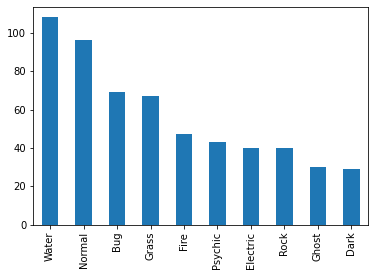

In [54]:
df.loc[df['Legendary']==False,'Elemen 1'].value_counts().head(10).plot(kind="bar")

Plot 2:
- Kita coba lihat Stats ATK tertinggi , dengan formula : atk + (2*sp.atk) -- dengan membuat kolom baru 'Total ATK'
- Dari kolom 'Total ATK' ,kita coba urutkan tertinggi sampai terendah dan divisualisasikan dengan plot

In [35]:
df_copy = df.copy()
df_copy['Total ATK'] = df_copy['Attack'] + (2*df_copy['Sp. Atk'])
df_copy

,Nama Pokemon,Elemen 1,Elemen 2,Total Stats,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total ATK
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,179
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,222
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,282
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,344
4,Charmander,Fire,N/A,309,39,52,43,60,50,65,1,False,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,300
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,480
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,410
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,500


<AxesSubplot:xlabel='Nama Pokemon'>

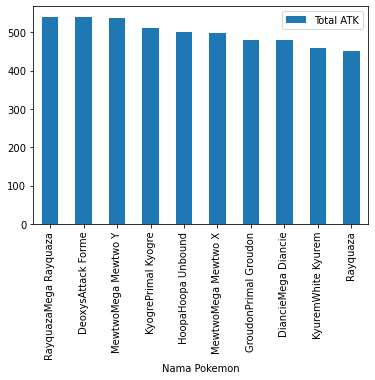

In [36]:
df_copy[['Nama Pokemon','Total ATK']].sort_values(by='Total ATK',ascending=False).head(10).plot(x='Nama Pokemon',y='Total ATK',kind='bar')

Plot 3:
- Kita coba buat berdasarkan masing - masing generasi , ada berapa yang Legendary

<AxesSubplot:xlabel='Generation,Legendary'>

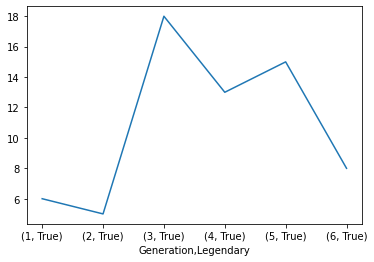

In [37]:
df_copy[df['Legendary']==True].groupby('Generation')['Legendary'].value_counts().plot(kind='line')

---

## Conclusions, Assumptions, Overall Analysis

Kesimpulan yang dapat diambil adalah :
- Legendary muncul pada maksimumnya saat di generasi ke - 3
- Saya akan memutuskan untuk mengambil Pokemon Rayquazamega Rayquaza , karena berdasarkan TotalATK nya, paling besar 
- Elemen terbanyak pada pokemon Non Legendary adalah Air
- Berdasarkan Total Stats, Elemen 1 dan 2 sama - sama Dragon yang menduduki rata - rata TotalStats tertinggi (stats secara keseluruhan)
- 38% Pokemon Legendary tidak memiliki elemen kedua
- Pokemon dengan stats tertinggi ialah pokemon yang tidak memiliki elemen kedua (MewtwoMega Mewtwo Y)

---

### Buat coba coba

In [38]:
grbyGen = df.groupby('Generation')
a = grbyGen.get_group(1)['Elemen 1'].value_counts()
af = a.to_frame()
elemengen1 = af.assign(Generasi = 1)



In [39]:
grbyGen = df.groupby('Generation')
a = grbyGen.get_group(2)['Elemen 1'].value_counts()
af = a.to_frame()
elemengen2 = af.assign(Generasi = 2)

In [40]:
grbyGen = df.groupby('Generation')
a = grbyGen.get_group(3)['Elemen 1'].value_counts()
af = a.to_frame()
elemengen3 = af.assign(Generasi = 3)

In [41]:
grbyGen = df.groupby('Generation')
a = grbyGen.get_group(4)['Elemen 1'].value_counts()
af = a.to_frame()
elemengen4 = af.assign(Generasi = 4)

In [42]:
grbyGen = df.groupby('Generation')
a = grbyGen.get_group(5)['Elemen 1'].value_counts()
af = a.to_frame()
elemengen5 = af.assign(Generasi = 5)

In [43]:
grbyGen = df.groupby('Generation')
a = grbyGen.get_group(6)['Elemen 1'].value_counts()
af = a.to_frame()
elemengen6 = af.assign(Generasi = 6)

In [44]:
frames = [elemengen1,elemengen2,elemengen3,elemengen4,elemengen5,elemengen6]
result = pd.concat(frames)
result

,Elemen 1,Generasi
Water,31,1
Normal,24,1
Fire,14,1
Bug,14,1
Poison,14,1
...,...,...
Dark,3,6
Electric,3,6
Poison,2,6
Ice,2,6
